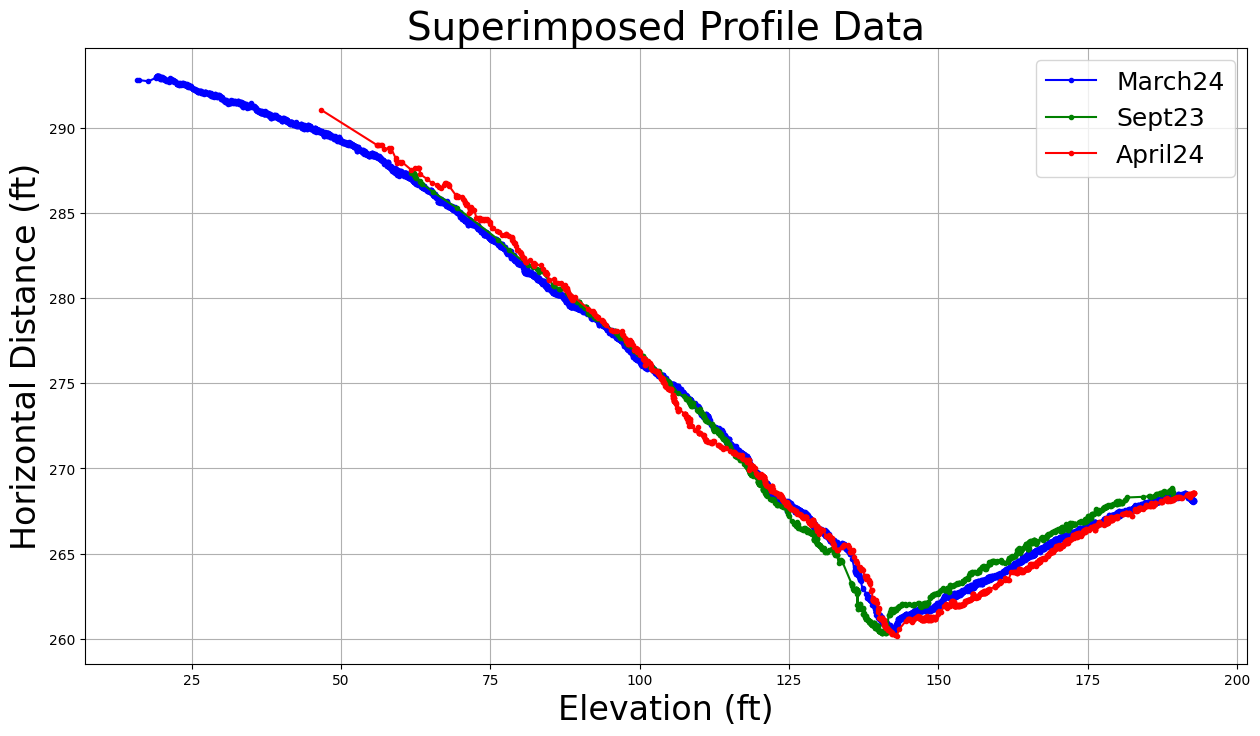

In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def extract_points_from_xml(file_path):
    # Load and parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract points data from <PntList2D>
    namespace = {'landxml': 'http://www.landxml.org/schema/LandXML-1.2'}
    pnt_list_2d = root.find('.//landxml:ProfSurf/landxml:PntList2D', namespace)

    # Parse the points
    points = pnt_list_2d.text.strip().split()
    x = []
    y = []
    for i in range(0, len(points), 2):
        x.append(float(points[i]))
        y.append(float(points[i + 1]))
    
    return x, y

# File paths
files = [
   r"E:\OneDrive\JSU\01 Projects\Arnob\Frame01_Comparison.xml"
]

# Colors for the plots
colors = ['b', 'g', 'r']
labels = ['March24', 'Sept23', 'April24']

plt.figure(figsize=(15, 8))

# Extract points and plot each section
for i, file in enumerate(files):
    x, y = extract_points_from_xml(file)
    plt.plot(x, y, marker='o', linestyle='-', color=colors[i], label=labels[i], markersize=3)

plt.title('Superimposed Profile Data', fontsize=28)
plt.xlabel('Elevation (ft)', fontsize=24)
plt.ylabel('Horizontal Distance (ft)', fontsize=24)
plt.grid(True)
plt.legend(fontsize=18)
plt.show()

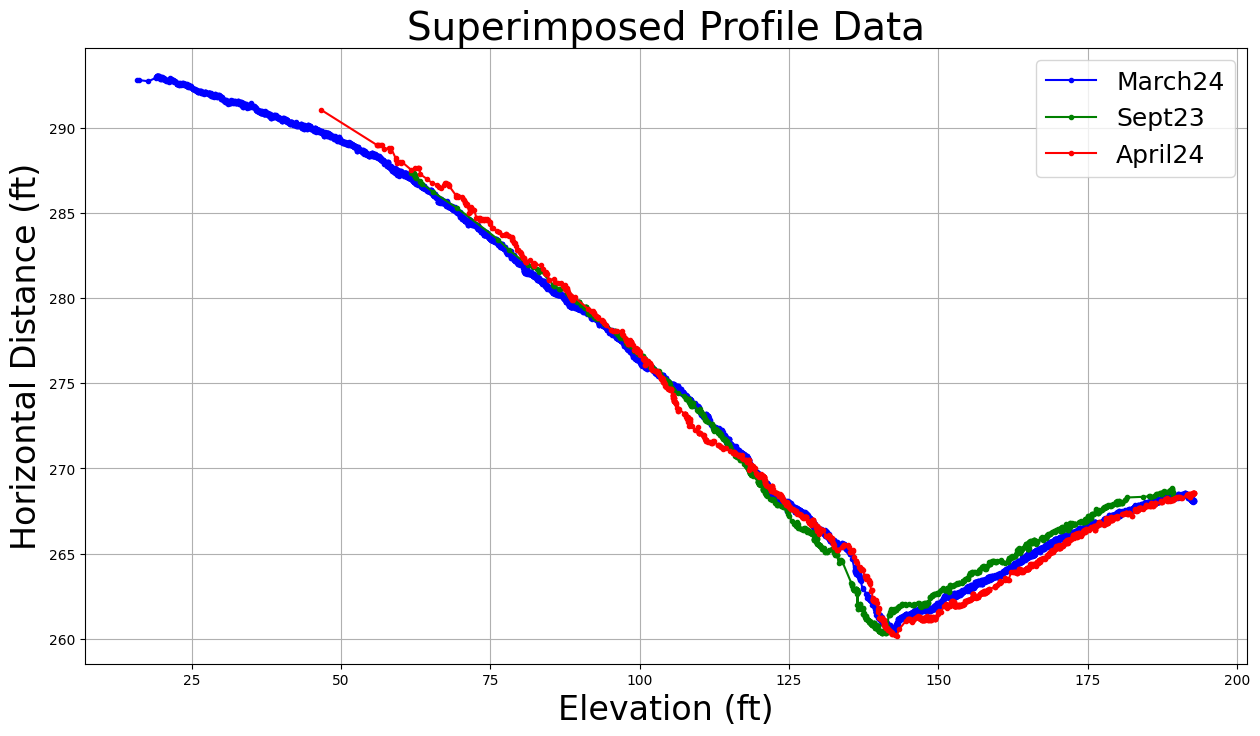

In [3]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd

def extract_points_from_xml(file_path):
    # Load and parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract points data from <PntList2D>
    namespace = {'landxml': 'http://www.landxml.org/schema/LandXML-1.2'}
    pnt_list_2d = root.find('.//landxml:ProfSurf/landxml:PntList2D', namespace)

    # Parse the points
    points = pnt_list_2d.text.strip().split()
    x = []
    y = []
    for i in range(0, len(points), 2):
        x.append(float(points[i]))
        y.append(float(points[i + 1]))
    
    return x, y

# File paths
files = [
    "C:\\Users\\J01012191\\OneDrive - Jackson State University\\Documents\\March24.xml",
    "C:\\Users\\J01012191\\OneDrive - Jackson State University\\Documents\\Sept23.xml",
    "C:\\Users\\J01012191\\OneDrive - Jackson State University\\Documents\\April24.xml"
]

# Colors for the plots
colors = ['b', 'g', 'r']
labels = ['March24', 'Sept23', 'April24']

# Initialize a dictionary to store data for exporting
data_for_export = {'X_March24': [], 'Y_March24': [], 'X_Sept23': [], 'Y_Sept23': [], 'X_April24': [], 'Y_April24': []}

plt.figure(figsize=(15, 8))

# Extract points and plot each section
for i, file in enumerate(files):
    x, y = extract_points_from_xml(file)
    plt.plot(x, y, marker='o', linestyle='-', color=colors[i], label=labels[i], markersize=3)
    # Store the data in the dictionary
    data_for_export[f'X_{labels[i]}'] = x
    data_for_export[f'Y_{labels[i]}'] = y

# Find the maximum length of the lists
max_length = max(len(data_for_export[key]) for key in data_for_export)

# Pad the lists with None to make them equal in length
for key in data_for_export:
    data_for_export[key] += [None] * (max_length - len(data_for_export[key]))

plt.title('Superimposed Profile Data', fontsize=28)
plt.xlabel('Elevation (ft)', fontsize=24)
plt.ylabel('Horizontal Distance (ft)', fontsize=24)
plt.grid(True)
plt.legend(fontsize=18)

# Save the plot as an image
plt.savefig('superimposed_profile_data.png')

# Show the plot
plt.show()

# Create a DataFrame and save the data to an Excel file
df = pd.DataFrame(data_for_export)
df.to_excel('superimposed_profile_data.xlsx', index=False)

In [7]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd

def extract_points_from_xml(file_path):
    # Load and parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract points data from each <ProfSurf>
    namespace = {'landxml': 'http://www.landxml.org/schema/LandXML-1.2'}
    prof_surfs = root.findall('.//landxml:ProfSurf', namespace)

    data = {}
    for prof_surf in prof_surfs:
        name = prof_surf.get('name')
        pnt_list_2d = prof_surf.find('landxml:PntList2D', namespace)

        # Parse the points
        points = pnt_list_2d.text.strip().split()
        x = []
        y = []
        for i in range(0, len(points), 2):
            x.append(float(points[i]))
            y.append(float(points[i + 1]))

        data[name] = (x, y)

    return data

# File paths
file_path = r"C:\Users\J01012191\OneDrive\JSU\02 Areas\05 Site Monitoring\I-55\SuperPostition\LineBB.xml"

# Extract points from the XML file
data = extract_points_from_xml(file_path)

# Initialize a dictionary to store data for exporting
data_for_export = {}

plt.figure(figsize=(15, 8))

# Colors and labels for the plots
colors = ['b', 'g']
for i, (name, (x, y)) in enumerate(data.items()):
    plt.plot(x, y, marker='o', linestyle='-', color=colors[i], label=name, markersize=1)
    # Store the data in the dictionary
    data_for_export[f'X_{name}'] = x
    data_for_export[f'Y_{name}'] = y

# Find the maximum length of the lists
max_length = max(len(data_for_export[key]) for key in data_for_export)

# Pad the lists with None to make them equal in length
for key in data_for_export:
    data_for_export[key] += [None] * (max_length - len(data_for_export[key]))

plt.title('Section B-B' Profile', fontsize=28)
plt.xlabel('Elevation (ft)', fontsize=24)
plt.ylabel('Horizontal Distance (ft)', fontsize=24)
plt.grid(True)
plt.legend(fontsize=18)

# Save the plot as an image
plt.savefig(r'C:\Users\J01012191\OneDrive\JSU\02 Areas\05 Site Monitoring\I-55\SuperPostition\superimposed_profile_data_LineBB.png')

# Show the plot
plt.show()

# Create a DataFrame and save the data to an Excel file
df = pd.DataFrame(data_for_export)
df.to_excel(r'C:\Users\J01012191\OneDrive\JSU\02 Areas\05 Site Monitoring\I-55\SuperPostition\superimposed_profile_data_LineBB.xlsx', index=False)

print(df.head())


SyntaxError: unterminated string literal (detected at line 57) (3862313732.py, line 57)

In [27]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd

def extract_points_from_xml(file_path):
    # Load and parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract points data from each <ProfSurf>
    namespace = {'landxml': 'http://www.landxml.org/schema/LandXML-1.2'}
    profiles = root.findall('.//landxml:ProfSurf', namespace)

    data = {}
    for profile in profiles:
        name = profile.get('name')
        pnt_list_2d = profile.find('landxml:PntList2D', namespace)

        # Parse the points
        points = pnt_list_2d.text.strip().split()
        x = []
        y = []
        for i in range(0, len(points), 2):
            x.append(float(points[i]))
            y.append(float(points[i + 1]))

        data[name] = (x, y)

    return data

def plot_profile(data, title, save_path):
    plt.figure(figsize=(15, 8))
    colors = ['b', 'g', 'r']
    labels = list(data.keys())

    for i, (label, (x, y)) in enumerate(data.items()):
        plt.plot(x, y, marker='o', linestyle='-', color=colors[i % len(colors)], label=label, markersize=3)

    plt.title(title, fontsize=28)
    plt.xlabel('Horizontal Distance (ft)', fontsize=24)
    plt.ylabel('Elevation (ft)', fontsize=24)
    plt.grid(True)
    plt.legend(fontsize=18)
    
    plt.savefig(save_path)
    plt.show()

# Load the XML file
file_path = r"C:\Users\J01012191\OneDrive\JSU\02 Areas\05 Site Monitoring\I-55\SuperPostition\I55_Grenada_June24.xml"
data = extract_points_from_xml(file_path)

# Plot each profile
profiles = {
    'LineAA': {k: v for k, v in data.items() if 'LineAA' in k},
    'LineBB': {k: v for k, v in data.items() if 'LineBB' in k},
    'LineCC': {k: v for k, v in data.items() if 'LineCC' in k}
}

# Save directory
save_directory = r"C:\Users\J01012191\OneDrive\JSU\02 Areas\05 Site Monitoring\I-55\SuperPostition"

for line, profile_data in profiles.items():
    if profile_data:  # Only plot if there is data
        plot_profile(profile_data, f'Superimposed Profile Data - {line}', f'{save_directory}\\superimposed_profile_data_{line}.png')
